In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from PIL import Image
import cv2
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import convolve

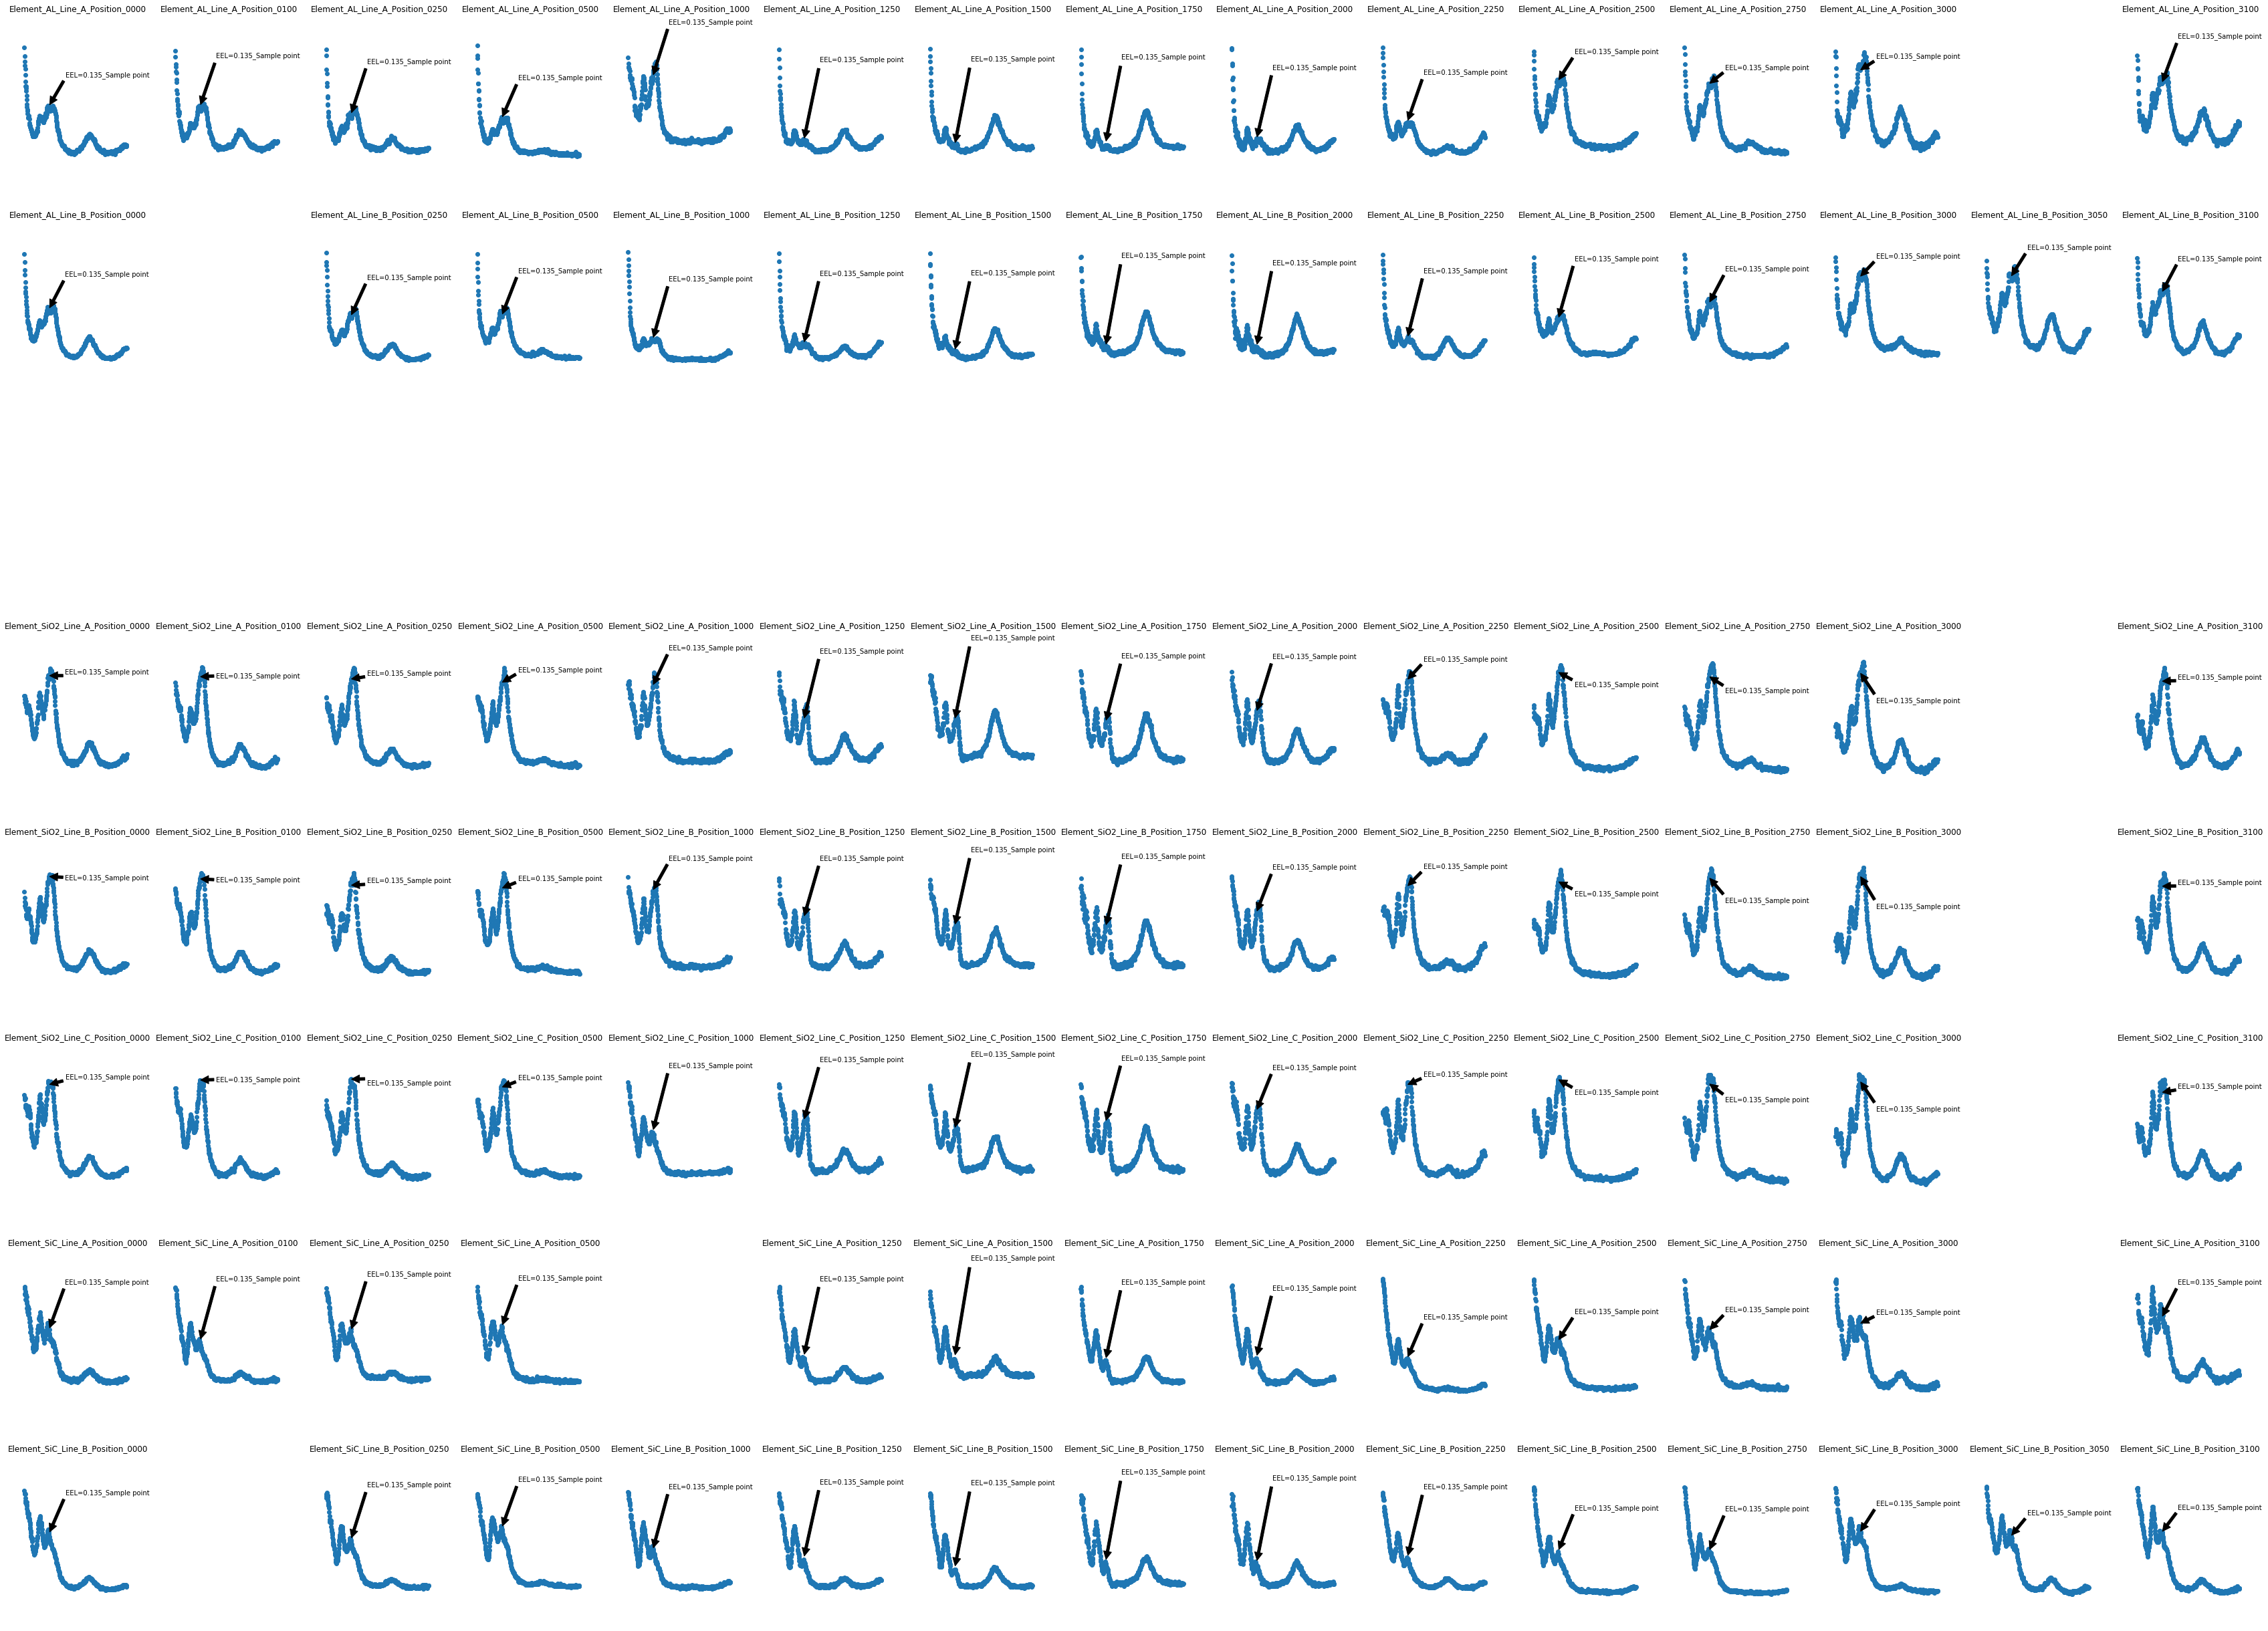

In [8]:
error=0.001
lower=400
upper=950
Num=300
num=300
tt='reflect'
val=1
typ='thin_plate'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
alanum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
number=['0000','0100','0250','0500']
label=['A','B','C']
total=[alanum,albnum,numbers,numbers,numbers,sianum,sibnum]
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3050')
number.append('3100')
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
fig= plt.figure(figsize=(60,50))
z=0
for k in ['AL','SiO2','SiC']:
    for i in label:
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                z+=1
                #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                try:
                    df=pd.read_table('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    plt.subplot(9,15,z),plt.scatter(E,I)
                    for column in df.index:
                            if column>0.135-0.001 and column<0.135+0.001:
                                y=df.loc[column].values[0]
                    plt.title('Element_{}_Line_{}_Position_{}'.format(k,i,j))
                    plt.xticks(np.arange(0, 0.55, step=0.05))
                    plt.axis('off')
                    plt.annotate('EEL=0.135_Sample point', xy=(0.135,y),xytext=(0.2,0.04),
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    )
                    #print('Picture saved')
                except Exception as e:
                    pass
plt.savefig('RawData.png')

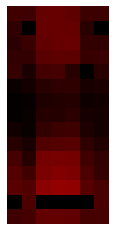

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from PIL import Image
import cv2
def getSiO2(test,error,times,lower,upper):
    number=['0000','0100','0250','0500']
    label=['A','B','C']
    for i in range(1000,3001,250):
        number.append(str(i))
    number.append('3050')
    number.append('3100')
#--------------------------------------------------------------
    ii=0
    dicnumber1={}
    whole1={}
    a=[]
    b=[]
    c=[]
    an=[]
    bn=[]
    cn=[]
    for i in label:
        for j in number:
            xs=[]
            ys=[]
            ii+=1
            try:
                df=pd.read_table('3p1um-SiO2-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(i,j))
                df.columns=['energyloss','intensity']
                E=df['energyloss'][lower:upper]
                I=df['intensity'][lower:upper]
                #plt.subplot(5,9,ii),plt.plot(E,I)
                #plt.savefig('SiO2{}{}.png'.format(i,j),dpi=700)
                for x,y in zip (E,I):
                    xs.append(x)
                    ys.append(y)
                for k in range(len(xs)):
                    if xs[k]>test-error and xs[k]<test+error:
                        yf=[ys[k]*times,0,0]
                        yfn=ys[k]
                if i=='A':
                    a.append(yf)
                    an.append(yfn)
                if i=='B':
                    b.append(yf)
                    bn.append(yfn)
                if i=='C':
                    c.append(yf)
                    cn.append(yfn)
            except Exception as e:
                if i=='A':
                    a.append([0,0,0])
                    an.append(0)
                if i=='B':
                    b.append([0,0,0])
                    bn.append(0)
                if i=='C':
                    c.append([0,0,0])
                    cn.append(0)
                pass
    whole1['A']=a
    whole1['B']=b
    whole1['C']=c
    dicnumber1['A']=an
    dicnumber1['B']=bn
    dicnumber1['C']=cn
    dfn1=DataFrame(dicnumber1)
    dfn1.index=number
    #display(dic)
    #display(len(a),len(b),len(c))
    df1=DataFrame(whole1)
    df1.index=number
    #display(df1) 
    return df1,dfn1
    #display(dic,len(a))
def getSiC(test,error,times,lower,upper):
    number=['0000','0100','0250','0500']
    label=['A','B']
    for i in range(1000,3001,250):
        number.append(str(i))
    number.append('3050')
    number.append('3100')
    number
    ii=0
    dicnumber2={}
    whole={}
    a=[]
    b=[]
    an=[]
    bn=[]
    for i in label:
        for j in number:
            yfs=[]
            yfns=[]
            xs=[]
            ys=[]
            ii+=1
            try:
                df=pd.read_table('3p1um-SiC-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(i,j))
                df.columns=['energyloss','intensity']
                E=df['energyloss'][lower:upper]
                I=df['intensity'][lower:upper]
                #plt.subplot(5,9,ii),plt.plot(E,I)
                #plt.savefig('SiC{}{}.png'.format(i,j),dpi=700)
                for x,y in zip (E,I):
                    xs.append(x)
                    ys.append(y)
                for k in range(len(xs)):
                    if xs[k]>test-error and xs[k]<test+error:
                        yf=[ys[k]*times,0,0]
                        xf=xs[k]
                        yfn=ys[k]
                if i=='A':
                    a.append(yf)
                    an.append(yfn)
                if i=='B':
                    b.append(yf)
                    bn.append(yfn)
            except Exception as e:
                if i=='A':
                    a.append([0,0,0])
                    an.append(0)
                if i=='B':
                    b.append([0,0,0])
                    bn.append(0)
                pass
    whole['A']=a
    #display(len(a),len(number))
    whole['B']=b
    dicnumber2['A']=an
    dicnumber2['B']=bn
    dfn2=DataFrame(dicnumber2)
    dfn2.index=number
    #whole['C']=c
    df2=DataFrame(whole)
    df2.index=number
    #display(df2)    
    return df2, dfn2
def getAL(test,error,times,lower,upper):
    number=['0000','0100','0250','0500']
    label=['A','B']
    for i in range(1000,3001,250):
        number.append(str(i))
    number.append('3050')
    number.append('3100')
    number
    ii=0
    dic={}
    dicnumber3={}
    whole={}
    a=[]
    b=[]
    an=[]
    bn=[]
    for i in label:
        for j in number:
            xs=[]
            ys=[]
            ii+=1
            try:
                df=pd.read_table('3p1um-AL-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(i,j))
                df.columns=['energyloss','intensity']
                E=df['energyloss'][lower:upper]
                I=df['intensity'][lower:upper]
                #plt.subplot(5,9,ii),plt.plot(E,I)
                #plt.savefig('Al{}{}.png'.format(i,j),dpi=700)
                for x,y in zip (E,I):
                    xs.append(x)
                    ys.append(y)
                for k in range(len(xs)):
                    if xs[k]>test-error and xs[k]<test+error:
                        yf=[ys[k]*times,0,0]
                        yfn=ys[k]
                        xf=xs[k]
                if i=='A':
                    a.append(yf)
                    an.append(yfn)
                if i=='B':
                    b.append(yf)
                    bn.append(yfn)
            except Exception as e:
                if i=='A':
                    a.append([0,0,0])
                    an.append(0)
                if i=='B':
                    b.append([0,0,0])
                    bn.append(0)
                pass
    whole['A']=a
    #display(len(a),len(number))
    whole['B']=b
    dicnumber3['A']=an
    dicnumber3['B']=bn
    dfn3=DataFrame(dicnumber3)
    dfn3.index=number
    df3=DataFrame(whole)
    df3.index=number
    #display(df3)    
    return df3, dfn3
def lis(Num):
    for j in np.linspace(0.134,0.135,Num):
        error=0.0005
        time=2550
        lower=5
        upper=700
        df1,dfn1=getSiO2(j,error,time,lower,upper)
        df2,dfn2=getSiC(j,error,time,lower,upper)
        df3,dfn3=getAL(j,error,time,lower,upper)
        finaldf=pd.concat([df3,df1,df2],axis=1,sort=False)
        finaldfn=pd.concat([dfn3,dfn1,dfn2],axis=1,sort=False)
        finaldfn.transpose()
        #display(finaldf)
        finaldfn.to_csv('ZZSEEL_{}_error_{}_times={}.csv'.format(j,error,time))
        finaldf.to_csv('EEL_{}_error_{}_times={}.csv'.format(j,error,time))
        z=finaldf.values.tolist()
        im = np.array(z, dtype=np.uint8)
        plt.axis('off')
        plt.imshow(im)
        '''font = cv2.FONT_HERSHEY_SIMPLEX 
        colors=(255,255,255)
        org=(100,70)
        image=cv2.putText(img=im,text=str(finaldf),org=org,fontFace=font,fontScale=1,color=colors)
        imag=cv2.putText(image,'EEL={}'.format(j),org,font,fontScale=1, color=colors)
        plt.imshow(imag)'''
        plt.savefig('ZXSEEL_{}_error_{}_times={}.png'.format(j,error,time),dpi=800)
    return finaldfn.transpose()
z=lis(2)

In [65]:
z.to_csv('RawData.csv')
z

,0000,0100,0250,0500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100,3050
A,0.025635,0.018862,0.016896,0.019636,0.021108,0.004435,0.002293,0.001836,0.006915,0.016207,0.027951,0.032948,0.035158,0.024480,0.000000
B,0.024395,0.000000,0.022745,0.019800,0.010337,0.008479,0.003214,0.003757,0.003619,0.009880,0.015256,0.025557,0.032126,0.026960,0.030491
A,0.039379,0.040331,0.037775,0.035209,0.026406,0.015419,0.012018,0.015151,0.019881,0.031966,0.046087,0.047946,0.054536,0.038899,0.000000
B,0.040216,0.040153,0.040007,0.036329,0.027435,0.018513,0.013892,0.014805,0.023216,0.032661,0.046711,0.051585,0.057304,0.039066,0.000000
C,0.037519,0.039892,0.041249,0.036608,0.015515,0.018703,0.014622,0.016742,0.024946,0.034516,0.045913,0.048741,0.056769,0.038005,0.000000
A,0.023562,0.016016,0.020000,0.021759,0.000000,0.009611,0.006256,0.009061,0.011481,0.018497,0.025657,0.030245,0.034777,0.027115,0.000000
B,0.023665,0.000000,0.018851,0.022152,0.015806,0.010802,0.007074,0.008189,0.008379,0.012658,0.019731,0.020724,0.028514,0.028085,0.029293


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,"[185.9281762024861, 0, 0]","[136.80483007867105, 0, 0]","[122.5489970113599, 0, 0]","[142.41639186459838, 0, 0]","[153.09443723820203, 0, 0]","[32.16504860488149, 0, 0]","[16.631755422089345, 0, 0]","[13.313414345455502, 0, 0]","[50.15439119066725, 0, 0]","[117.54898288191059, 0, 0]","[202.725184076658, 0, 0]","[238.9705765972994, 0, 0]","[255.0, 0, 0]","[0.0, 0, 0]","[177.5496737927891, 0, 0]"
2,"[193.6299522939906, 0, 0]","[0.0, 0, 0]","[180.5363112479809, 0, 0]","[157.1582220659778, 0, 0]","[82.04798901216557, 0, 0]","[67.30244997442978, 0, 0]","[25.50940418157857, 0, 0]","[29.82150477274678, 0, 0]","[28.729002602995074, 0, 0]","[78.41740626731745, 0, 0]","[121.09159253401006, 0, 0]","[202.85942845821828, 0, 0]","[255.0, 0, 0]","[242.0203265513234, 0, 0]","[213.9907222308986, 0, 0]"
3,"[184.12809003848017, 0, 0]","[188.58180886377554, 0, 0]","[176.6280140241111, 0, 0]","[164.6302292787566, 0, 0]","[123.47237967952834, 0, 0]","[72.09511905057408, 0, 0]","[56.19426927427977, 0, 0]","[70.84529259907892, 0, 0]","[92.96049902366076, 0, 0]","[149.4668487459842, 0, 0]","[215.49454097655695, 0, 0]","[224.1894974515814, 0, 0]","[255.0, 0, 0]","[0.0, 0, 0]","[181.8875637845487, 0, 0]"
4,"[178.95967187926635, 0, 0]","[178.67749429123887, 0, 0]","[178.02886825186616, 0, 0]","[161.66320491764876, 0, 0]","[122.08460698601938, 0, 0]","[82.38024663914706, 0, 0]","[61.81743938617321, 0, 0]","[65.88100489695806, 0, 0]","[103.30989139940343, 0, 0]","[145.3398013257756, 0, 0]","[207.86361086701672, 0, 0]","[229.55269148488955, 0, 0]","[255.0, 0, 0]","[0.0, 0, 0]","[173.83963575204112, 0, 0]"
5,"[168.53040809213516, 0, 0]","[179.18931525972806, 0, 0]","[185.2856221574908, 0, 0]","[164.4378047337922, 0, 0]","[69.6896443383373, 0, 0]","[84.01318355672085, 0, 0]","[65.6794457808851, 0, 0]","[75.20093034781559, 0, 0]","[112.05255552647913, 0, 0]","[155.0410393115207, 0, 0]","[206.2360125011917, 0, 0]","[218.93522783444226, 0, 0]","[255.0, 0, 0]","[0.0, 0, 0]","[170.71093025987284, 0, 0]"
6,"[172.77123313534497, 0, 0]","[117.44036992922084, 0, 0]","[146.65167651815366, 0, 0]","[159.54592061306838, 0, 0]","[0.0, 0, 0]","[70.47602964251652, 0, 0]","[45.873906102067096, 0, 0]","[66.43768678345462, 0, 0]","[84.18611538173525, 0, 0]","[135.6268750474815, 0, 0]","[188.12968124245577, 0, 0]","[221.77077468714037, 0, 0]","[255.0, 0, 0]","[0.0, 0, 0]","[198.8239867636529, 0, 0]"
7,"[206.00450376158324, 0, 0]","[0.0, 0, 0]","[164.0992523709997, 0, 0]","[192.83776136199512, 0, 0]","[137.59297878153484, 0, 0]","[94.02980567988698, 0, 0]","[61.58064211370581, 0, 0]","[71.28384548733455, 0, 0]","[72.942116658968, 0, 0]","[110.1911257986198, 0, 0]","[171.7650093577374, 0, 0]","[180.40688337536582, 0, 0]","[248.2204866656114, 0, 0]","[255.0, 0, 0]","[244.4871277120693, 0, 0]"


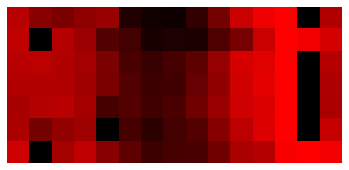

In [3]:
a,b=z.shape
New={}
for i in range(1,a+1):
    x=z.iloc[i-1:i].values[0]
    #print(x)
    xa=max(x)
    xi=min(x)
    total=[]
    for j in x:
        total.append([(j-xi)/(xa-xi)*255,0,0])
    #print(total)
    New['{}'.format(i)]=total
#display(New)
df1=DataFrame(New)
df=df1.transpose()
display(df)
df.to_csv('according.csv')
Z=df.values.tolist()
im = np.array(Z, dtype=np.uint8)
plt.axis('off')
plt.imshow(im)
plt.savefig('RawDataEx.png',bbox_inches='tight',dpi=800)